In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#download mnist data and split into train and test sets
df = pd.read_csv('CartoonData.csv')

In [4]:
X = df.drop(['Label'], axis = 1).values
Y = df['Label']

X = StandardScaler().fit_transform(X)

Xnew = []
for i in range(0, len(X), 250):
    Xnew.append(X[i:250+i])
    
Ynew = []
for j in range(0, 186250, 250):
    Ynew.append(0)
    
for k in range(0, 194750, 250):
    Ynew.append(1)
    
from itertools import groupby
print([len(list(group)) for key, group in groupby(Y)])

Xnew = np.array(Xnew)
print(Xnew[0].shape)
print(Xnew.shape)
#X = StandardScaler().fit_transform(Xnew)

X_train, X_test, y_train, y_test = train_test_split(Xnew, Ynew, test_size = 0.30, random_state = 101)

[186250, 194750]
(250, 128)
(1524, 250, 128)


In [6]:
X_train.shape

(1066, 250, 128)

In [7]:
#reshape data to fit model
X_train = X_train.reshape(1066,250,128,1)
X_test = X_test.reshape(458,250,128,1)

In [8]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

C:\Apps\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


array([1., 0.], dtype=float32)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
#create model
model = Sequential()
#add model layers 
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(250,128,1),padding='SAME'))
model.add(Conv2D(32, (5,5), activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=10, verbose=0)
print(history)

Instructions for updating:
Use tf.cast instead.


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


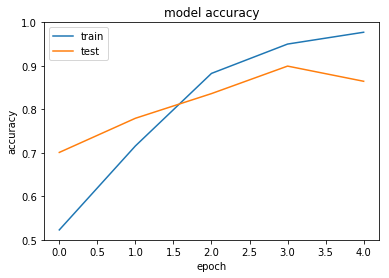

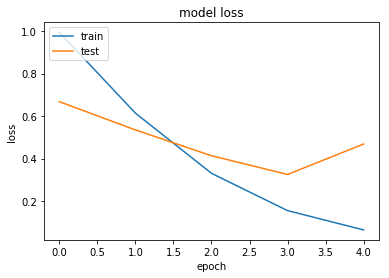

In [12]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[1.7191166e-01, 8.2808834e-01],
       [9.9958521e-01, 4.1480083e-04],
       [7.3255323e-02, 9.2674464e-01],
       [9.9900573e-01, 9.9430315e-04]], dtype=float32)

In [14]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.46880409993459043, 0.8646288204401341]


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 250, 128, 32)      832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 64, 32)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 125, 64, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32768128  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________